<h1 style="color:rgb(0,120,170)">Neural Networks and Deep Learning</h1>

## [Implementing Neural Networks with Numpy](https://github.com/SurajDonthi/Neural-Networks-from-Scratch)

### Part 4: Neural Networks from Scratch  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Activation Function

In the hidden layer, we will use the tanh activation function and in the output layer, I will use the sigmoid function. It is easy to find information on both the sigmoid function and the tanh function graph. I don’t want to bore you with explanations, so I will just implement it.

![Sigmoid](./Images/2nn0.png)

In [2]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

Setting Parameters

What are parameters and hyperparameters? Parameters are weights and biases. Hyperparameters effect parameters and are before the learning begins. Setting hyperparameters perfectly correctly at first is not a piece of cake, you’ll need to tinker and tweak your values. The learning rate, number of iterations, and regularization rate, among others, can all be considered as hyperparameters.

Wondering how to set the matrices sizes? The answer just below!

What does all that mean? For example:
(layer 0 so L = 0) number of neurons in input layers = 3
(layer 1 so L = 1) number of neurons in hidden layers = 5
(layer 2 so L = 2) number of neurons in output layers = 1

I hope this all makes sense! Let’s set the parameters:

In [3]:
def setParameters(X, Y, hidden_size):
    np.random.seed(3)
    
    input_size = X.shape[0] # number of neurons in input layer
    output_size = Y.shape[0] # number of neurons in output layer.
    
    W1 = np.random.randn(hidden_size, input_size) * np.sqrt(2/input_size)
    b1 = np.zeros((hidden_size, 1))
    
    W2 = np.random.randn(output_size, hidden_size) * np.sqrt(2/hidden_size)
    b2 = np.zeros((output_size, 1))
    return {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}

We define W1, b1, W2, and b2. It doesn’t hurt if you set your biases to zero at first. However, be very careful when initializing weights. Never set the weights to zero at first. Why exactly? Well, if you do, then in Z = Wx + b, Z will always be zero. If you are building a multi-layer neural network, neurons in every layer will behave like there is one neuron. So how do we initialize weights at first? I use he initialization.

![Sigmoid](./Images/2nn1.png)

In [4]:
hidden_size = 5
output_size = 1
np.random.randn(output_size, hidden_size) * np.sqrt(2/hidden_size)

array([[-0.88453178, -0.29633863, -0.81801034,  0.65983871, -0.83182346]])

Or just use this:

In [5]:
np.random.randn(output_size, hidden_size) * 0.01

array([[-0.01374672,  0.00194091,  0.01042713,  0.0115245 , -0.01348048]])

![Sigmoid](./Images/2nn2.png)

In [6]:
def forwardPropagation(X, params):
    Z1 = np.dot(params['W1'], X) + params['b1']
    A1 = np.tanh(Z1)
  
    Z2 = np.dot(params['W2'], A1) + params['b2']
    y = sigmoid(Z2)  
    return y, {'Z1': Z1, 'Z2': Z2, 'A1': A1, 'y': y}

Why we are storing {‘Z1’: Z1, ‘Z2’: Z2, ‘A1’: A1, ‘y’: y}? Because we will use them when back-propagating.

Cost function

We just looked at forward propagation and obtained a prediction (y). We calculate it using a cost function.

![Cost](./Images/2nn3.png)
![Cost](./Images/2nn4.png)

We update our parameters and find the best parameter that gives us the minimum possible cost. I’m not going to delve into derivatives, but note that on the graph above, if you are on the right sight of the parabola, the derivative (slope) will be positive, so the parameter will decrease and move left approaching the parameter that returns the minimum cost. On the left side, the slope will be negative, so the parameter increases towards the value we want. Let’s look at the cost function we will use:

![Cost](./Images/2nn5.png)

In [7]:
def cost(predict, actual):
    m = actual.shape[1]
    cost__ = -np.sum(np.multiply(np.log(predict), actual) + np.multiply((1 - actual), np.log(1 - predict)))/m
    return np.squeeze(cost__)

Backpropagation

We’ve found the cost, now let’s go back and find the derivative of our weights and biases. In a future piece, I plan to show you how to derivate them step by step.

In [8]:
def backPropagation(X, Y, params, cache):
    m = X.shape[1]
    
    dy = cache['y'] - Y
    dW2 = (1 / m) * np.dot(dy, np.transpose(cache['A1']))
    db2 = (1 / m) * np.sum(dy, axis=1, keepdims=True)
    
    dZ1 = np.dot(np.transpose(params['W2']), dy) * (1-np.power(cache['A1'], 2))
    dW1 = (1 / m) * np.dot(dZ1, np.transpose(X))
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

What are the params and cache in def backPropagation(X, Y, params, cache)? When we use forward propagation, we store values to use during backpropagation. Params are parameters (weight and biases).
Updating Parameters

Now that we have our derivatives, we can use the equation below:
![derivatives](./Images/2nn6.png)

In that equation, alpha (α) is the learning rate hyperparameter. We need to set it to some value before the learning begins. The term to the right of the learning rate is the derivative. We know alpha and derivatives, let’s update our parameters.

In [9]:
def updateParameters(gradients, params, learning_rate = 1.2):
    W1 = params['W1'] - learning_rate * gradients['dW1']
    b1 = params['b1'] - learning_rate * gradients['db1']
    W2 = params['W2'] - learning_rate * gradients['dW2']
    b2 = params['b2'] - learning_rate * gradients['db2']
    return {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}

All About Loops

We need to run many interations to find the parameters that return the minimum cost. Let’s loops it!

In [10]:
def fit(X, Y, learning_rate, hidden_size, number_of_iterations = 5000):
    params = setParameters(X, Y, hidden_size)
    cost_ = []
    for j in range(number_of_iterations):
        y, cache = forwardPropagation(X, params)
        costit = cost(y, Y)
        gradients = backPropagation(X, Y, params, cache)
        params = updateParameters(gradients, params, learning_rate)
        cost_.append(costit)
    return params, cost_

Hidden_size means the number of neurons in the hidden layer. It looks like a hyperparameter. Because you set it before learning begins! What return params, cost_ tells us. params are the best parameters we found and cost_ is just cost we estimated in every episode.  

Let’s Try Our Code!

Use sklearn to create a dataset.

In [11]:
import sklearn.datasets
X, Y = sklearn.datasets.make_moons(n_samples=500, noise=.2)
X, Y = X.T, Y.reshape(1, Y.shape[0])

X input, Y actual output.

In [12]:
params, cost_ = fit(X, Y, 0.3, hidden_size, 5000)

I set the learning rate to 0.3, the number of neurons in the hidden layer was ser to 5 and the number of iterations to 5000.

Feel free to try with different values.

Let’s draw a graph showing how the cost function changed with every episode:

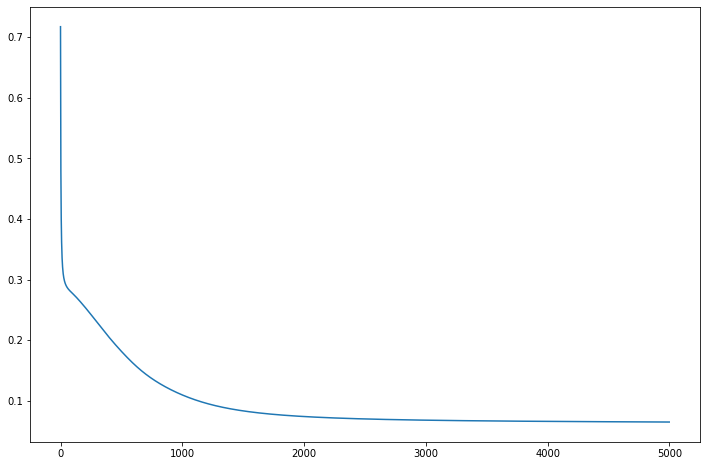

In [13]:
plt.figure(figsize=(12,8))
plt.plot(cost_)

Bingo! We did it!

In [14]:
print(cost_[0])
print(cost_[-1])

0.7173555393533149
0.0648040545981011
